In [47]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import glob
import pytesseract

In [48]:
def plot_meas(img):
    plt.figure(figsize = (20,16))
    plt.imshow(img)

In [49]:
# build up training data
'''

dir = './image_dir'
files


'''

"\n\ndir = './image_dir'\nfiles\n\n\n"

In [50]:
dirs = {0:'TEM-2015-02-13',1:'TEM-2015'}

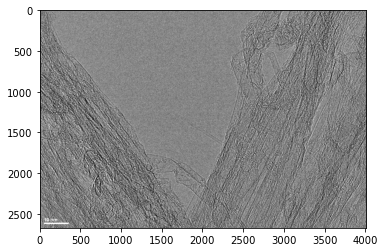

In [51]:
img = mpimg.imread('../cnt_data/TEM-2018-01-05/LX0104R1-FMES120-120kV/02.jpg')
plt.imshow(img)

In [31]:
# https://stackoverflow.com/questions/26392336/importing-images-from-a-directory-python-to-list-or-dictionary

import glob
image_list = []
for filename in glob.glob('../cnt_data/TEM-2018-01-05/LX0104R1-FMES120-120kV/*.jpg'): #assuming gif
    im=Image.open(filename)
    image_list.append(im)

NameError: name 'Image' is not defined

In [52]:
import glob
dir_path = 'C:/Users/Max/OneDrive/git_repos/cnt_data/TEM-2018-01-05/LX0104R1-FMES120-120kV/'
f_list = glob.glob(dir_path+'*.jpg')

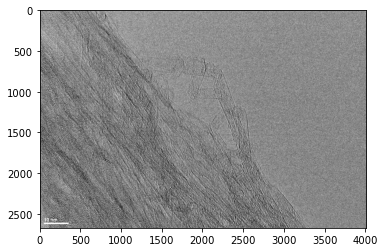

In [53]:
img = mpimg.imread(f_list[0])
plt.imshow(img);

### Get ROIs from labeled image

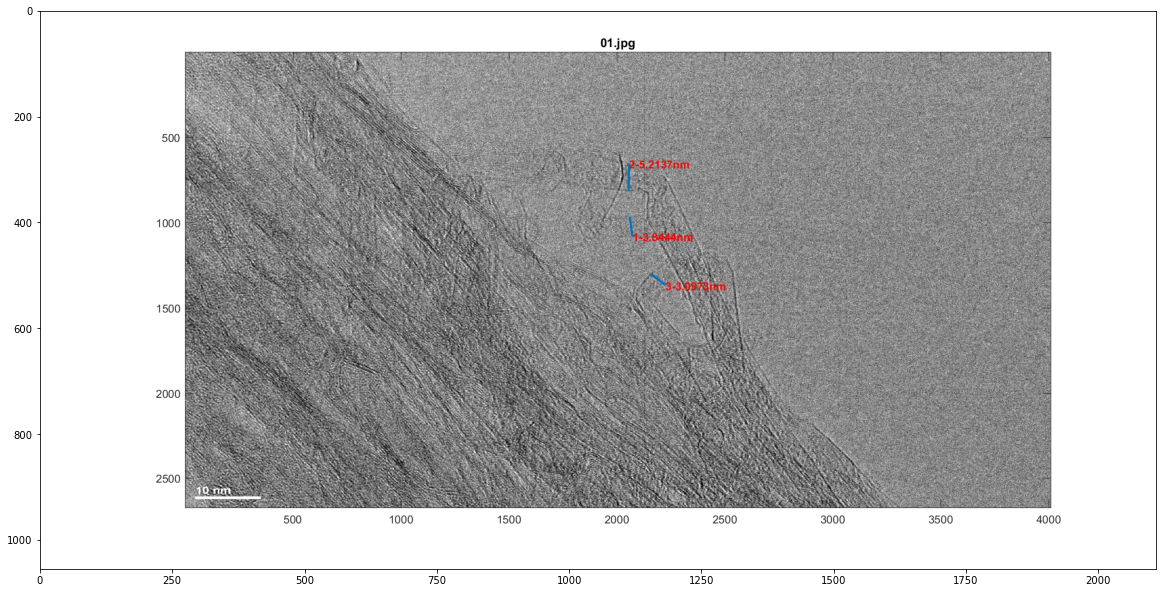

In [54]:
img = mpimg.imread('../cnt_data/TEM-2018-01-05/LX0104R1-FMES120-120kV/Measurments/meas1.tif') / 255
plot_meas(img)

In [55]:
img.shape

(1055, 2109, 3)

In [56]:
def get_text(img):
    text_img = np.zeros(img.shape)
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            text_img[y,x,:] = img[y,x,:] - img[y,x,2] #subtract blue channel from each channel
    return text_img.clip(min=0,max=1)

def get_lines(img):
    text_img = np.zeros(img.shape)
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            text_img[y,x,:] = img[y,x,:] - np.mean(img[y,x,:]) #subtract blue channel from each channel
            text_img[y,x,0:2] = [0,0] # set R and G channels to 0
    return text_img.clip(min=0,max=1)

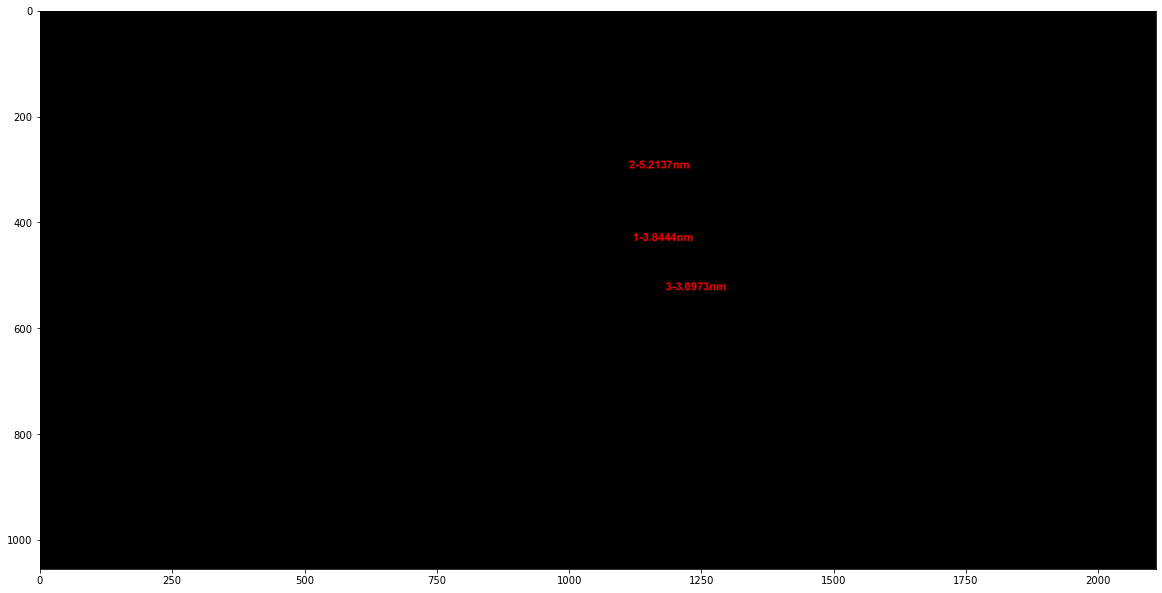

In [79]:
text_img = get_text(img)
plot_meas(text_img)

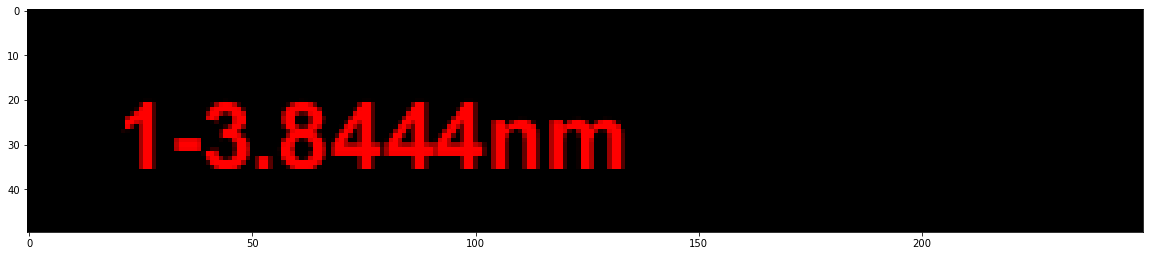

In [80]:
text_1 = text_img[400:450,1100:1350,:]
plot_meas(text_1)

In [ ]:
lines = get_lines(img)
plot_meas(lines)

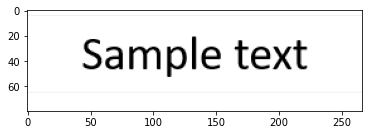

In [21]:
sample_text_img = mpimg.imread('text_image_sample.png')
plt.imshow(sample_text_img)

In [22]:
sample_text_img *= 255
sample_text_img = text_img.astype(np.uint8)

In [24]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
print(pytesseract.image_to_string(sample_text_img))

Sample text



In [81]:
text_1 = text_1.sum(axis = 2)
type(text_1)

numpy.ndarray

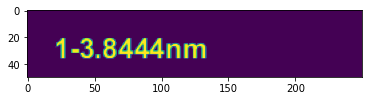

In [82]:
plt.imshow(text_1 * 255)

In [83]:
text_1 = 255 * text_1.astype(np.uint8)

In [84]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
print(pytesseract.image_to_string(text_1))

RCC)



In [71]:
text_img = 255* (text_img.sum(axis = 2)).astype(np.uint8)


AxisError: axis 2 is out of bounds for array of dimension 2

2-5.2137nm

RCC)

3-3.0973nm



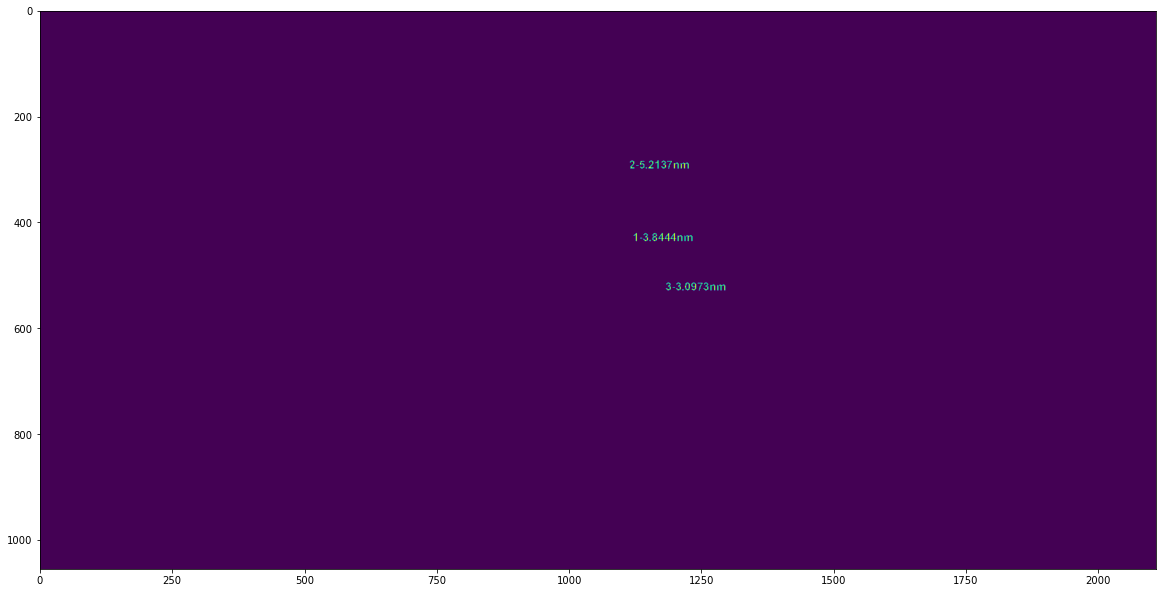

In [72]:
plot_meas(text_img)
print(pytesseract.image_to_string(text_img))

In [74]:
labels = (pytesseract.image_to_string(text_img))

In [77]:
labels.split('\n')

['2-5.2137nm', '', 'RCC)', '', '3-3.0973nm', '\x0c']

In [86]:
# https://stackoverflow.com/questions/45322630/how-to-detect-lines-in-opencv

# get coordinates from lines
text_img = get_text(img)
gray = cv2.cvtColor(text_img,cv2.COLOR_BGR2GRAY)

kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

error: OpenCV(4.4.0) c:\users\appveyor\appdata\local\temp\1\pip-req-build-2b5g8ysb\opencv\modules\imgproc\src\color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0xf162147f::Set<1,-1,-1>,struct cv::impl::A0xf162147f::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)
